## Deep learning

**Deep learning Libs:**

1- Tensorflow ( Google )

2- Pytorch ( Facebook )

3- Keras

4- Caffe

5- JAX ( JavaScript )

6- CNTK

7- ONNX

8- FastAI

**We will be Using Tensroflow, why?**


1-Easy to integrate ( mobile app, web application, embedded system )

2-Could be converted to multiple formats ( tflite -to work on smartphones, tfjs )

3-Work in the background using C++

4+Open source, frequently updated by Google, Customizable

**Keras**
an interface ( enable us to write simpler code ), work as a wrapper: tf, pytorch, CNTK


**Activation functions**

1-Sigmoid

2-Relu

3-Tanh

4-Softmax

5-Leaky Relu

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import pandas as np
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping


### Load the dataset

In [28]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [29]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
total_pixels = 32*32*3
total_pixels

3072

In [31]:
y_train.shape

(50000, 1)

In [32]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [33]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [34]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [35]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [36]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### plot some images to see what they are

In [37]:
def plot_sample(X,y ,index):
  plt.figure(figsize=(15,5))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

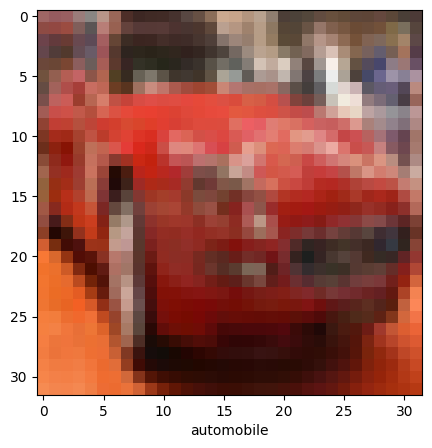

In [38]:
plot_sample(X_train,y_train,5)

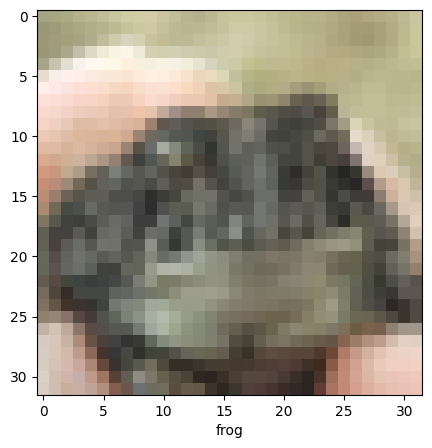

In [39]:
plot_sample(X_train,y_train,25)

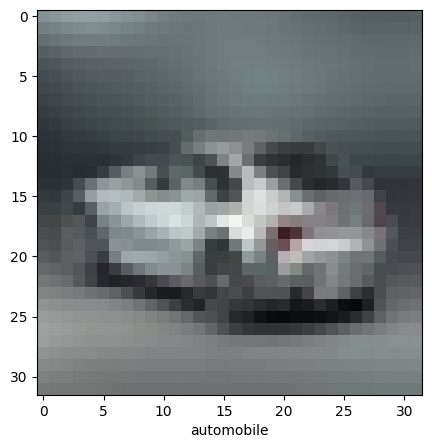

In [40]:
plot_sample(X_train,y_train,250)

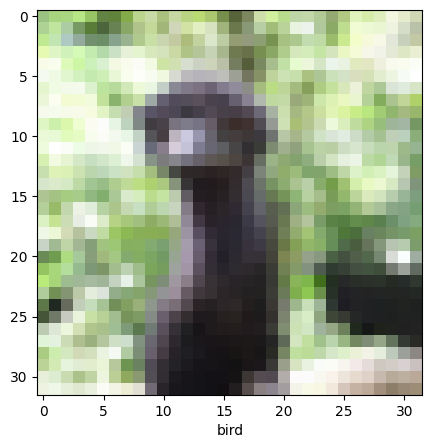

In [41]:
plot_sample(X_train,y_train,55)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
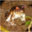

In [42]:
X_train[0]

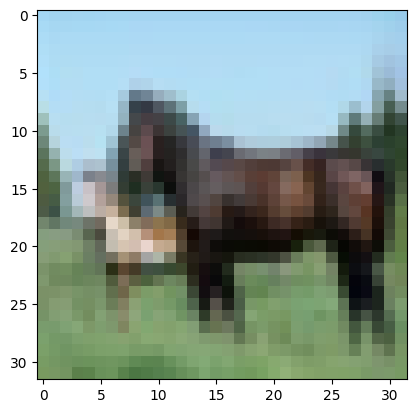

In [43]:
plt.imshow(X_train[12])

In [44]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [45]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## ANN

In [46]:
ANN = models.Sequential([
    layers.Flatten(input_shape =(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
ANN.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2779 - loss: 2.1959
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3952 - loss: 1.6799
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4299 - loss: 1.5861
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4502 - loss: 1.5331
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4580 - loss: 1.4986
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4782 - loss: 1.4649
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4904 - loss: 1.4335
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4984 - loss: 1.4039
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5055 - loss: 1.3792
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5110 - loss: 1.3609
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5146 - loss: 1.3445
Epoch 12/50
1563/1563 ━━━

In [55]:
results  =[0]

In [57]:
modelprediction  = np.argmax(ANN[0])
modelprediction

3

In [58]:
ANN = models.Sequential([
    layers.Flatten(input_shape =(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')


])

ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ANN.fit(X_train,y_train,epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2781 - loss: 2.2209
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3930 - loss: 1.6881
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4305 - loss: 1.5898
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4497 - loss: 1.5329
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4693 - loss: 1.4893
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4747 - loss: 1.4656
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4862 - loss: 1.4314
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4975 - loss: 1.4065
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5021 - loss: 1.3857
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5091 - loss: 1.3697
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5174 - loss: 1.3498
Epoch 12/50
1563/1563 ━━━━

In [60]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(120, activation='relu'),
        layers.Dense(40, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2545 - loss: 2.0511
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3656 - loss: 1.7777
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3989 - loss: 1.6883
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4230 - loss: 1.6325
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4334 - loss: 1.5969
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4448 - loss: 1.5647
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4587 - loss: 1.5308
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4635 - loss: 1.5158
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4691 - loss: 1.4959
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4758 - loss: 1.4757


In [61]:
ANN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4751 - loss: 1.7677


[1.782680630683899, 0.4754999876022339]

In [62]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(y_pred_classes[0:5] , y_test[0:5])

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3, 9, 9, 8, 4] [3 8 8 0 6]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.37      0.48      1000
           1       0.59      0.54      0.56      1000
           2       0.32      0.36      0.34      1000
           3       0.33      0.40      0.36      1000
           4       0.52      0.20      0.29      1000
           5       0.43      0.28      0.34      1000
           6       0.48      0.56      0.52      1000
           7       0.44      0.62      0.52      1000
           8       0.60      0.55      0.58      1000
           9       0.40      0.69      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



**Optimizers:** <br>
adam, adamax, adamw, gd, sgd, rms prop

**Loss**
<br>
called error function ( calculate error value )
<br>goal : loss ≈ 0

<br>

**HyperParameters**

1. Number of neuron in the hidden layer
2. Number of hidden layers
3. Number of epochs
1. Batch Size
2. Steps Per Epoch
3. Early Stop
4. Learning Rate



**Differ from problem to another:**
<br>
1. Classification ( binary classification, multi classification )                            
2. Regression                                    
3. Clustering

In [63]:

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model with early stopping
history = ann.fit(X_train, y_train, epochs=5, validation_split=0.1, callbacks=[early_stopping])



Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4832 - loss: 1.4522 - val_accuracy: 0.4810 - val_loss: 1.4763
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4836 - loss: 1.4467 - val_accuracy: 0.4966 - val_loss: 1.4349
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4948 - loss: 1.4277 - val_accuracy: 0.4874 - val_loss: 1.4309
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5002 - loss: 1.4084 - val_accuracy: 0.4924 - val_loss: 1.4381
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5032 - loss: 1.4031 - val_accuracy: 0.4842 - val_loss: 1.4455
